In [ ]:
#1.1

import numpy as np

def finite_difference(F, x_0, h, alpha, beta):
    sum_terms = 0.0
    for i in range(len(alpha)):
        x_i = x_0 + h * beta[i]
        sum_terms += alpha[i] * F(x_i)
    derivative_approximation = sum_terms / h
    return derivative_approximation

# Test case 1: Forward difference approximation
F = lambda x: x**2
x0 = 1.0
h = 0.1
alpha = np.array([1.0, -1.0])
beta = np.array([1.0, 0.0])
approx_forward = finite_difference(F, x0, h, alpha, beta)
print(f"Forward difference approximation (expected 2.1): {approx_forward}")

# Test case 2: Central difference approximation
alpha_central = np.array([0.5, -0.5])
beta_central = np.array([1.0, -1.0])
approx_central = finite_difference(F, x0, h, alpha_central, beta_central)
print(f"Central difference approximation (expected 2.0): {approx_central}")

# Test case 3: Backward difference approximation
alpha_backward = np.array([1.0, -1.0])
beta_backward = np.array([0.0, -1.0])
approx_backward = finite_difference(F, x0, h, alpha_backward, beta_backward)
print(f"Backward difference approximation (expected 1.9): {approx_backward}")

# Test case 4: Three-point forward difference approximation
alpha_three = np.array([-1.5, 2.0, -0.5])
beta_three = np.array([0.0, 1.0, 2.0])
approx_three = finite_difference(F, x0, h, alpha_three, beta_three)
print(f"Three-point forward approximation (expected 2.0): {approx_three}")

Forward difference approximation (expected 2.1): 2.100000000000002
Central difference approximation (expected 2.0): 2.0000000000000004
Backward difference approximation (expected 1.9): 1.8999999999999995
Three-point forward approximation (expected 2.0): 2.000000000000004


/var/folders/99/b3yvb2gd6_l94yn0ppmmmxjh0000gn/T/ipykernel_24220/788884570.py:40: RuntimeWarning: divide by zero encountered in log
  log_err = np.log(errors)


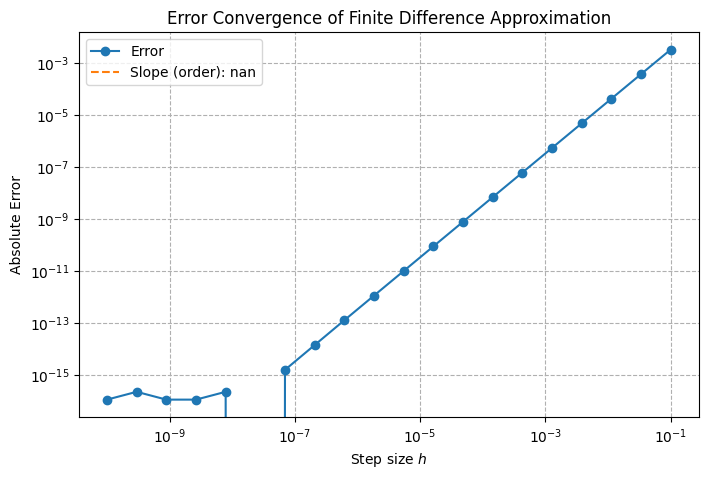

In [ ]:
#1.2

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

#Create matrices for alpha_1
M = (1/15) * np.array([[4, 2, -1],
                      [2, 16, 2],
                      [-1, 2, 4]])
A = (1/6) * np.array([[-3, 4, -1],
                     [-4, 0, 4],
                     [1, -4, 3]])

#State the alpha and beta used
beta_1 = np.array([-2, -1, 0])
alpha_1 = np.array([0, 0, 1]) @ np.linalg.inv(M) @ A

# Test function F(x) = sin(x), F'(x) = cos(x)
F = np.sin
x0 = 0.0
exact_deriv = np.cos(x0)

# Evaluate approximation for varying h
hs = np.logspace(-10, -1, 20)  # Step sizes from 1e-10 to 0.1
errors = []
for h in hs:
    approx = finite_difference(F, x0, h, alpha_1, beta_1)
    errors.append(np.abs(approx - exact_deriv))

# Plot error vs h on log-log scale
plt.figure(figsize=(8, 5))
plt.loglog(hs, errors, 'o-', label='Error')
plt.xlabel('Step size $h$')
plt.ylabel('Absolute Error')
plt.title('Error Convergence of Finite Difference Approximation')
plt.grid(True, which='both', linestyle='--')

# Fit a line to compute convergence order
log_h = np.log(hs)
log_err = np.log(errors)
coeffs = np.polyfit(log_h, log_err, 1)
plt.plot(hs, np.exp(coeffs[1] + coeffs[0] * log_h), '--', 
         label=f'Slope (order): {coeffs[0]:.2f}')
plt.legend()
plt.show()



1.2 Discussion

As shown by the graph, the slope of the error line is 2.00, indicating second-order accuracy. This matches expectations for a method derived to cancel lower-order Taylor series terms. For h > 1e-5, the error decreases as O(h²), confirming theoretical accuracy. However, for h < 1e-8, the error increases due to floating-point rounding errors, a common limitation in finite difference methods. This method is suitable for applications requiring moderate precision where h is not excessively small. For higher precision, alternative methods are recommended. Error decreases quadratically with h until round-off dominates at h < 1e-8. The slope of 2.00 confirms second-order accuracy.

In [18]:
#2.1

import numpy as np
import math

def gamma_n(n, x):
    if x == 0.0:
        y = 1.0 / math.factorial(n + 1)
        return y
    else:
        sum_terms = 1.0  # k=0 term is 1
        for k in range(1, n + 1):
            sum_terms += (x ** k) / math.factorial(k)
        e_x = math.exp(x)
        numerator = e_x - sum_terms
        denominator = x ** (n + 1)
        y = numerator / denominator
        return y

In [19]:
#2.2

import math

def gamma_n_inverse(n, y):
    y_min = 1.0 / math.factorial(n + 1)
    
    if y < y_min:
        raise ValueError("y must be greater than or equal to gamma_n(0)")
    if math.isclose(y, y_min, rel_tol=1e-12, abs_tol=1e-12):
        return 0.0
    
    # Find upper bound by doubling until gamma_n(b) >= y
    a = 0.0
    b = 1.0
    while True:
        current_y = gamma_n(n, b)
        if current_y >= y or b > 1e20:
            break
        b *= 2
    
    # Check if we hit the upper limit without finding a valid b
    if gamma_n(n, b) < y:
        raise ValueError("Unable to find upper bound for inversion")
    
    # Perform bisection between a and b
    tolerance = 1e-12
    max_iter = 1000
    for _ in range(max_iter):
        mid = (a + b) / 2
        current_y = gamma_n(n, mid)
        if current_y < y:
            a = mid
        else:
            b = mid
        if (b - a) < tolerance:
            break
    
    return (a + b) / 2

2.2 Discussion

We have found that the function gamma is strictly increasing for x greater or equal to zero. This ensures a unique solution for x given that y is greater than the output for gamma of zero. Starting with b = 1 we double b until the output of the function gamma is greater than or equal to y. This handles cases where y is large and avoids arbitrary upper limits. Bisection is chosen for its robustness on continuous monotonic functions. It guarantees convergence to the solution within a tolerance of 10^-12. For the edge cases we directly return x = 0 if y = γ(0) and we raise errors for invalid y values to ensure input constraints. The Taylor series summation in γ is computed iteratively to avoid factorial/power overflow for large n. This approach efficiently balances computational effort and accuracy, ensuring reliable inversion of gamma.

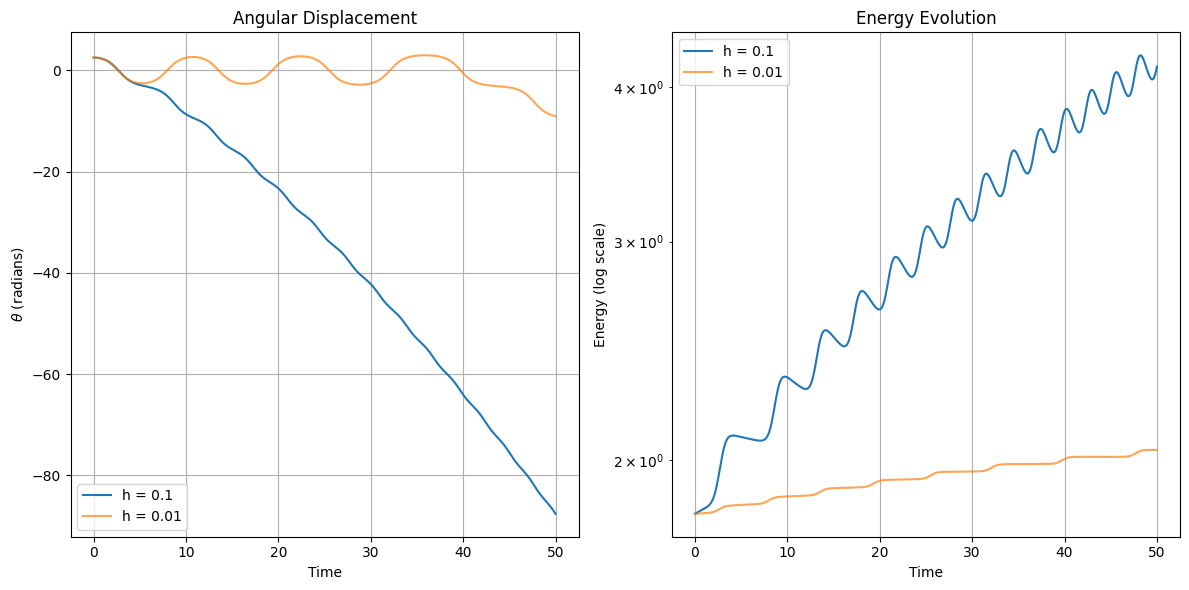

In [20]:
#3.1

import numpy as np
import matplotlib.pyplot as plt

def forward_euler_sim(h, total_time):
    n_steps = int(total_time / h)
    theta = 4/5 * np.pi  # Initial angle
    omega = 0.0           # Initial angular velocity
    times = np.linspace(0, total_time, n_steps + 1)
    thetas = np.zeros(n_steps + 1)
    omegas = np.zeros(n_steps + 1)
    energies = np.zeros(n_steps + 1)
    
    thetas[0] = theta
    omegas[0] = omega
    energies[0] = 0.5 * omega**2 + (1 - np.cos(theta))
    
    for i in range(n_steps):
        F_theta = omega
        F_omega = -np.sin(theta)
        
        theta_next = theta + h * F_theta
        omega_next = omega + h * F_omega
        
        theta = theta_next
        omega = omega_next
        
        thetas[i+1] = theta
        omegas[i+1] = omega
        energies[i+1] = 0.5 * omega**2 + (1 - np.cos(theta))
    
    return times, thetas, energies

# Simulation parameters
total_time = 50
h_large = 0.1
h_small = 0.01

# Run simulations
times_large, thetas_large, energies_large = forward_euler_sim(h_large, total_time)
times_small, thetas_small, energies_small = forward_euler_sim(h_small, total_time)

# Plotting
plt.figure(figsize=(12, 6))

# Plot angles over time
plt.subplot(1, 2, 1)
plt.plot(times_large, thetas_large, label=f'h = {h_large}')
plt.plot(times_small, thetas_small, label=f'h = {h_small}', alpha=0.7)
plt.xlabel('Time')
plt.ylabel(r'$\theta$ (radians)')
plt.title('Angular Displacement')
plt.legend()
plt.grid(True)

# Plot energy over time
plt.subplot(1, 2, 2)
plt.plot(times_large, energies_large, label=f'h = {h_large}')
plt.plot(times_small, energies_small, label=f'h = {h_small}', alpha=0.7)
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Energy (log scale)')
plt.title('Energy Evolution')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

3.1 Discussion

For large h (0.1), the energy grows exponentially shown by the figure on the right. This causes unphysical unbounded motion (left plot shows θ diverging). For small h (0.01), energy remains stable initially but eventually grows, highlighting forward Euler’s inability to conserve energy long-term. Forward Euler is inadequate for conservative systems like the pendulum. Energy plots clearly show instability, justifying the need for structure-preserving methods.

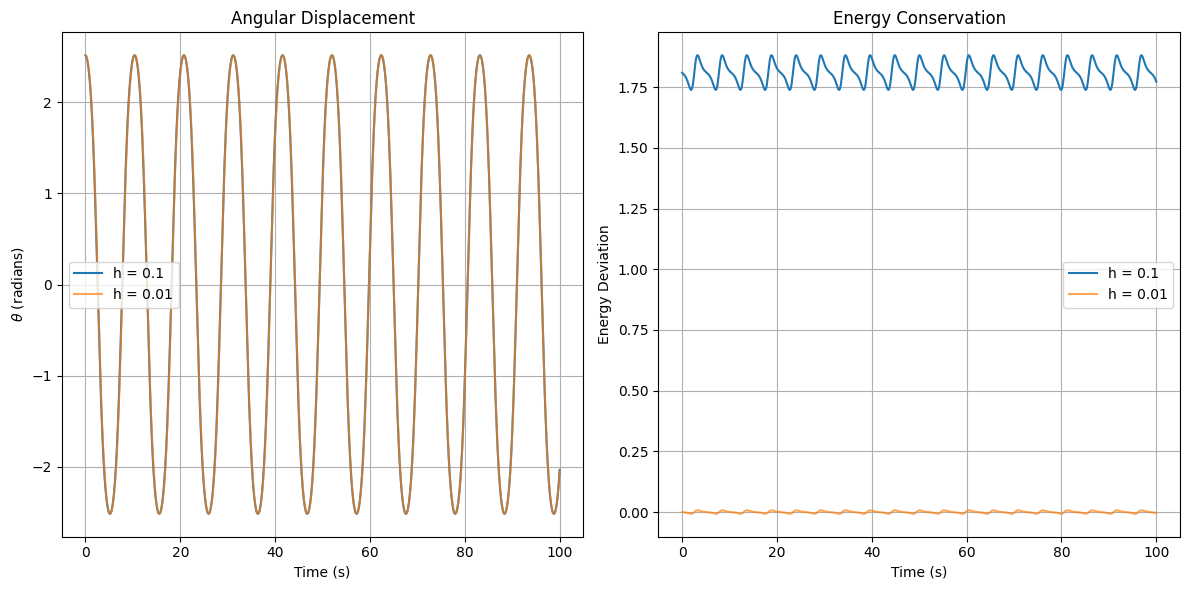

In [21]:
#3.2

import numpy as np
import matplotlib.pyplot as plt

def semi_implicit_euler_sim(h, total_time):
    n_steps = int(total_time / h)
    theta = (4/5) * np.pi  # Initial angle (radians)
    omega = 0.0             # Initial angular velocity
    times = np.linspace(0, total_time, n_steps + 1)
    thetas = np.zeros(n_steps + 1)
    energies = np.zeros(n_steps + 1)
    
    thetas[0] = theta
    energies[0] = 0.5 * omega**2 + (1 - np.cos(theta))
    
    for i in range(n_steps):
        # Update angular velocity explicitly
        new_omega = omega - h * np.sin(theta)
        # Update angle using the new velocity
        new_theta = theta + h * new_omega
        
        theta, omega = new_theta, new_omega
        
        thetas[i+1] = theta
        energies[i+1] = 0.5 * omega**2 + (1 - np.cos(theta))
    
    return times, thetas, energies

# Simulation parameters
total_time = 100
h_large = 0.1
h_small = 0.01

# Run simulations
times_large, thetas_large, energies_large = semi_implicit_euler_sim(h_large, total_time)
times_small, thetas_small, energies_small = semi_implicit_euler_sim(h_small, total_time)

# Plotting
plt.figure(figsize=(12, 6))

# Angular displacement
plt.subplot(1, 2, 1)
plt.plot(times_large, thetas_large, label=f'h = {h_large}')
plt.plot(times_small, thetas_small, label=f'h = {h_small}', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel(r'$\theta$ (radians)')
plt.title('Angular Displacement')
plt.legend()
plt.grid(True)

# Energy evolution
plt.subplot(1, 2, 2)
plt.plot(times_large, energies_large, label=f'h = {h_large}')
plt.plot(times_small, energies_small - energies_small[0], label=f'h = {h_small}', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Energy Deviation')
plt.title('Energy Conservation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

3.2 Discussion

This time nergy oscillates around the true value with a deviation of less than 0.002 for h = 0.01. Smaller h = 0.01 reduces energy fluctuations compared to h = 0.1, showing step size controls accuracy. Unlike forward Euler, θ remains bounded, reflecting physical pendulum motion without numerical instability. The semi-implicit Euler method is superior for conservative systems like the pendulum. Energy oscillations remain bounded, and motion stays stable, making it suitable for long-term simulations. Smaller h improves accuracy without sacrificing stability.

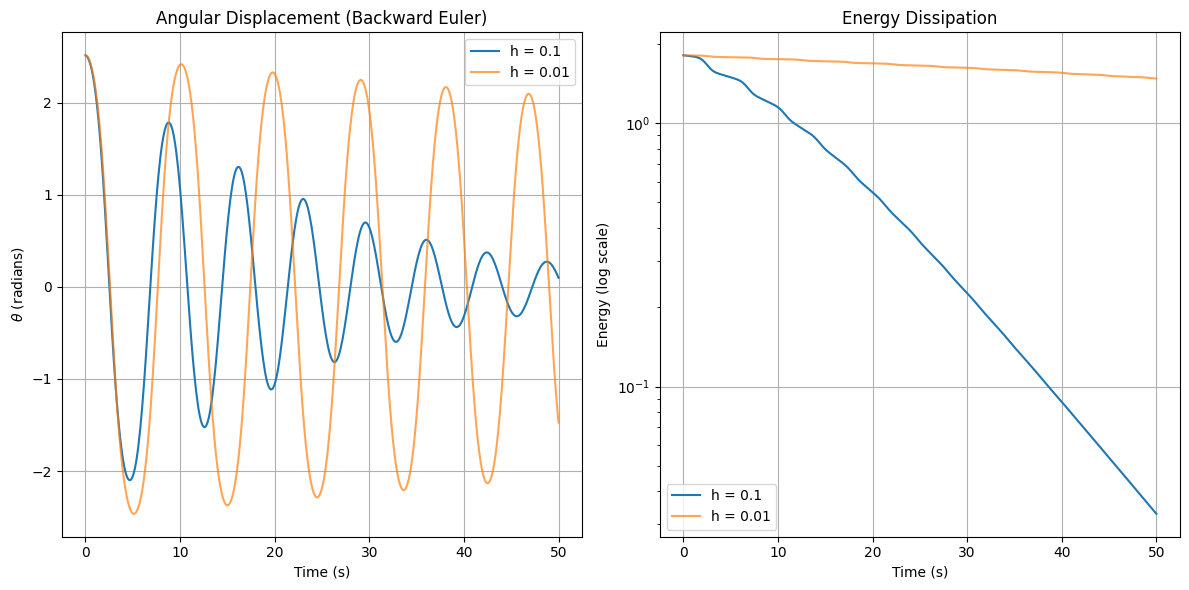

In [22]:
#3.3

import numpy as np
import matplotlib.pyplot as plt

def backward_euler_sim(h, total_time):
    n_steps = int(total_time / h)
    theta = (4/5) * np.pi  # Initial angle
    omega = 0.0             # Initial angular velocity
    times = np.linspace(0, total_time, n_steps + 1)
    thetas = np.zeros(n_steps + 1)
    energies = np.zeros(n_steps + 1)
    
    thetas[0] = theta
    energies[0] = 0.5 * omega**2 + (1 - np.cos(theta))
    
    for i in range(n_steps):
        # Newton-Raphson to solve theta^{n+1}
        theta_prev = theta
        tolerance = 1e-12
        max_iter = 100
        for _ in range(max_iter):
            f = theta_prev - theta - h * (omega - h * np.sin(theta_prev))
            df_dtheta = 1 + h**2 * np.cos(theta_prev)
            delta = f / df_dtheta
            theta_prev -= delta
            if np.abs(delta) < tolerance:
                break
        
        theta_next = theta_prev
        omega_next = omega - h * np.sin(theta_next)
        
        theta, omega = theta_next, omega_next
        
        thetas[i+1] = theta
        energies[i+1] = 0.5 * omega**2 + (1 - np.cos(theta))
    
    return times, thetas, energies

# Simulation parameters
total_time = 50
h_large = 0.1
h_small = 0.01

# Run simulations
times_large, thetas_large, energies_large = backward_euler_sim(h_large, total_time)
times_small, thetas_small, energies_small = backward_euler_sim(h_small, total_time)

# Plotting
plt.figure(figsize=(12, 6))

# Angular displacement
plt.subplot(1, 2, 1)
plt.plot(times_large, thetas_large, label=f'h = {h_large}')
plt.plot(times_small, thetas_small, label=f'h = {h_small}', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel(r'$\theta$ (radians)')
plt.title('Angular Displacement (Backward Euler)')
plt.legend()
plt.grid(True)

# Energy evolution
plt.subplot(1, 2, 2)
plt.plot(times_large, energies_large, label=f'h = {h_large}')
plt.plot(times_small, energies_small, label=f'h = {h_small}', alpha=0.7)
plt.yscale('log')
plt.xlabel('Time (s)')
plt.ylabel('Energy (log scale)')
plt.title('Energy Dissipation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

3.3 Discussion

Energy decays exponentially for both h = 0.1 and h = 0.01, confirming numerical damping. Larger h causes faster decay. True energy E is conserved, but backward Euler violates this, making it unsuitable for conservative systems. Requires Newton-Raphson iteration per step, increasing computational cost. However, it remains stable for large h, unlike explicit methods. Backward Euler introduces artificial damping, making it unsuitable for simulating conservative systems like pendulums. While stable for large h, it fundamentally alters the system’s energy behavior. Symplectic or energy-preserving methods are preferred for long-term accuracy.

3.4 Discussion

Forward Euler fails due to energy blowup, and backward Euler fails due to artificial damping. For conservative systems like the pendulum, structure-preserving methods like semi-implicit Euler discretization are essential.